<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/m6CV/d4/sol/Mini_projects_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini projects

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](https://github.com/Strive-School/ai_jun21/blob/main/M6-Computer%20Vision/04.%20Kernels%2C%20callbacks%20and%20thresholding/img/sketch.png?raw=1)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

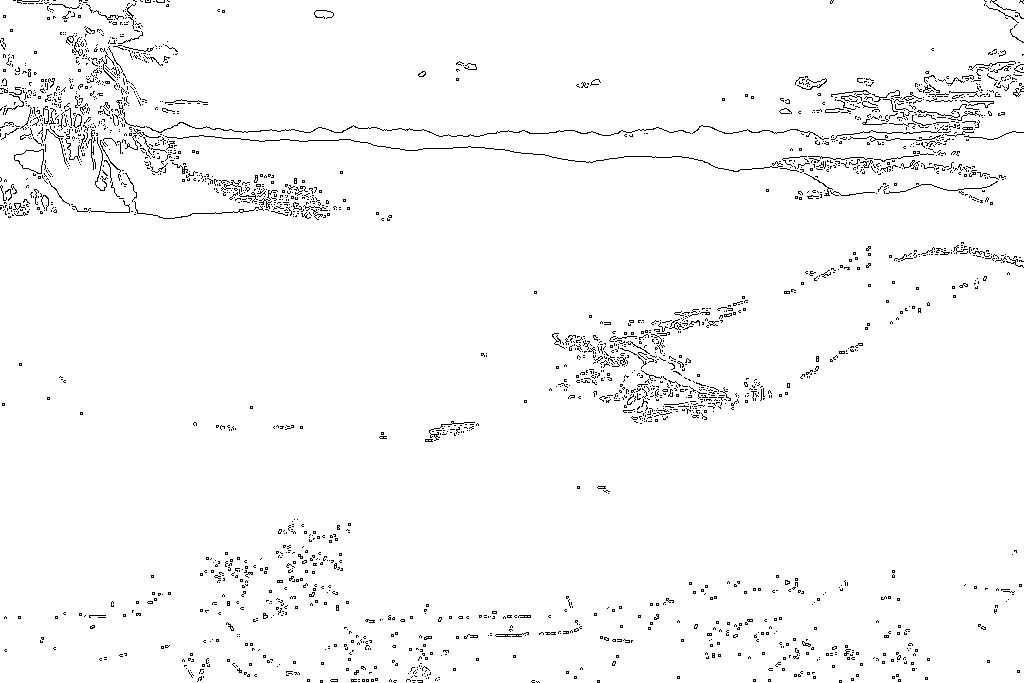

In [6]:
#duty 1 
day2 = cv2.imread('day2.jpg')
ret, th_img = cv2.threshold(day2, 200,255,cv2.THRESH_BINARY_INV)
#blur = cv2.GaussianBlur(th_img,(9,9),0)
canny = cv2.Canny(th_img,0,80)# by changing interval u can get better results
inversecanny = cv2.bitwise_not(canny)
cv2_imshow(inversecanny)

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

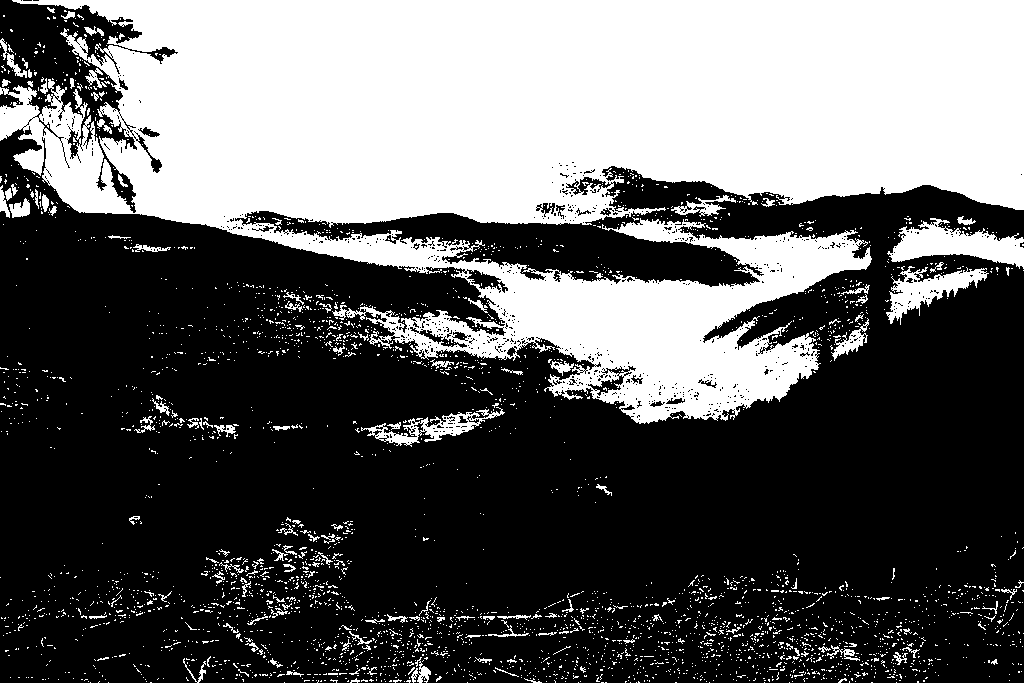

In [11]:
#black and white convertion
threshold_value = 127
threshold_type = 0
threshold_types = [cv2.THRESH_BINARY,cv2.THRESH_BINARY_INV]


def badas(image):
  image1 = image.copy()
  image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
  ret, thresh =cv2.threshold(image1,threshold_value,255,threshold_types[threshold_type])
  cv2_imshow(thresh)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
badas(day2)

In [16]:
#change the color of the image (got the negative )
def badas2(path):
  image = cv2.imread(path,0)
  return plt.imshow(image)

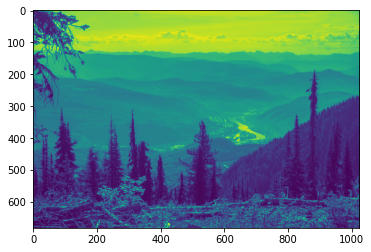

In [17]:
badas2('day2.jpg')

## Level 2

### Photo art app

In [ ]:
#dont run in colab nb it was created in vs code
import cv2 
threshold_value = 137
threshold_type = 0
threshold_types = [cv2.THRESH_BINARY,cv2.THRESH_BINARY_INV,cv2.THRESH_TOZERO_INV]
window_name = 'filters'
cv2.namedWindow(window_name)

cap = cv2.VideoCapture(0)
key = 0 
cv2.namedWindow(window_name,cv2.WINDOW_AUTOSIZE)
while (True):
    ret, frame = cap.read()
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    thresh,bla = cv2.threshold(gray_frame, threshold_value,255,threshold_types[threshold_type])


    cv2.imshow(window_name,bla)

    if key == ord('q'):
        break
    
    key = cv2.waitKey(1)



cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)

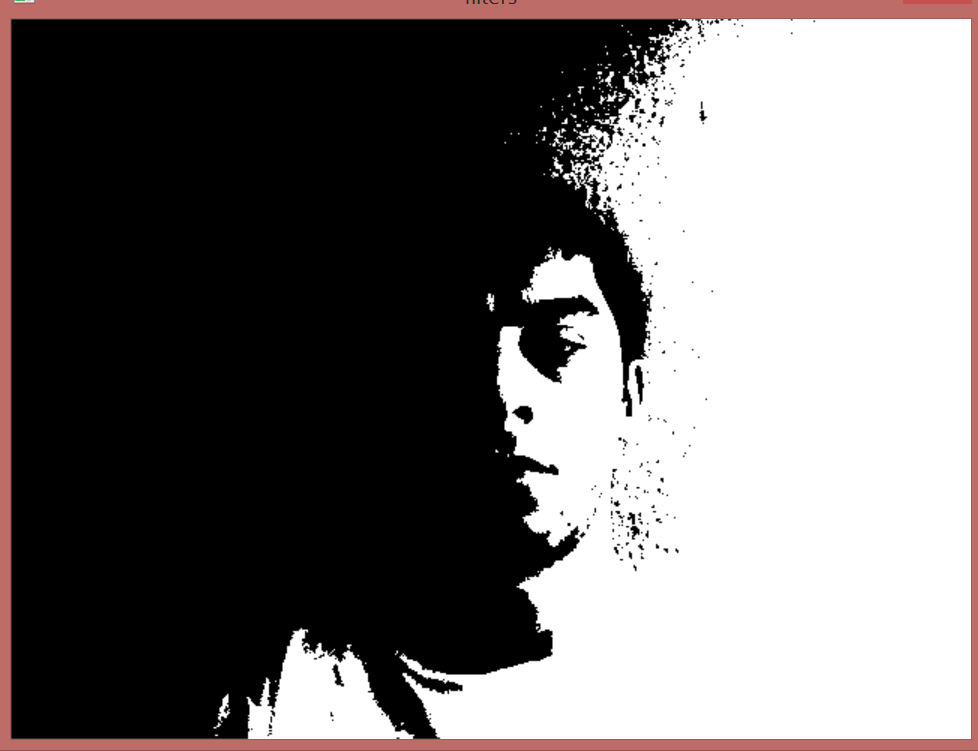

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](https://github.com/Strive-School/ai_jun21/blob/main/M6-Computer%20Vision/04.%20Kernels%2C%20callbacks%20and%20thresholding/img/n.png?raw=1)

### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](https://github.com/Strive-School/ai_jun21/blob/main/M6-Computer%20Vision/04.%20Kernels%2C%20callbacks%20and%20thresholding/img/4.png?raw=1)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits

In [44]:
def mnist(img):
    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_TRUNC)
    img = cv2.bitwise_not(img)
    
    kernel = np.ones((11, 11), np.uint8)
    img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.dilate(img, kernel, iterations=2) # two thicken the hand writing
    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
   
    img = cv2.medianBlur(img, 7)

    img = cv2.resize(img, (280, 280), interpolation=cv2.INTER_LANCZOS4) # the size of mnist is 28x28
    
    return img

In [48]:
two = cv2.imread('2.jpeg',0)
three = cv2.imread('3.jpeg',0)
four = cv2.imread('4.jpeg',0)
five = cv2.imread('5.jpeg',0)
test_numbers = [two, three, four, five] #

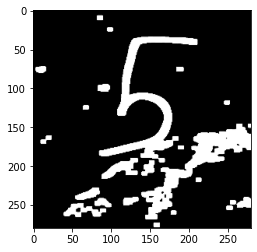

In [51]:
plt.imshow(mnist(five))

In [ ]:
#need to convert these numbers to save them and conver them to tensors

In [52]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd


import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils.data import  DataLoader

In [ ]:

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=3, shuffle=True)

# Download and load the test data

#testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [61]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

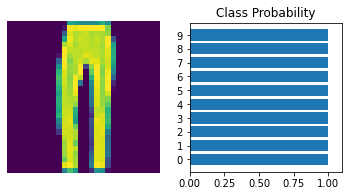

In [60]:
images, labels = next(iter(trainloader))
view_classify(images[1],labels[1])

In [ ]:
'''model = nn.Sequential(
    nn.Linear(28*28,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
)'''

'model = nn.Sequential(\n    nn.Linear(28*28,64),\n    nn.ReLU(),\n    nn.Linear(64,64),\n    nn.ReLU(),\n    nn.Linear(64,10)\n)'

In [ ]:
class NeuralNetworkk(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super().__init__() 
        #self.conv1 = nn.Conv2d(input_dim,num_hidden1,kernel_size = 2)
        self.fc1 = nn.Linear(input_dim, num_hidden1)
        self.drop = nn.Dropout(p = 0.25)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 10)
        
    def forward(self,x):
      #for layer 1 
      #x = x.flatten()
      #x = self.conv1(x)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      x = F.relu(x)
      x = self.drop(x)
      x = self.fc3(x)
      output = F.softmax(x, dim=1)
      return output
model = NeuralNetworkk(784, 100,640)

In [ ]:
optimiser = optim.Adam(model.parameters(), lr = 1e-3)
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model.to(device)

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
n_epochs = 10
for epoch in range(n_epochs):
  losss = []
  for batch_idx in trainloader:
    x, y = batch_idx
    b = x.size(0)
    x = x.view(b,-1)
    #x.to(device)
    #y.to(device)
    #forward 
    logits = model(x)


    #compute objective function
    J= loss(logits,y)

    #cleaning the gradients
    optimiser.zero_grad()

    #compute the part derivs
    J.backward()

    #step
    optimiser.step()



    losss.append(J.item()) 

losss = []
accuracy = []
model.train()



In [ ]:
for batch_idx in testloader:
  x, y = batch_idx

  b = x.size(0)
  x = x.view(b,-1)
  #x.to(device)
  #y.to(device)
  #forward 
  with torch.no_grad():

    logits = model(x)


  #compute objective function
  J= loss(logits,y)

  losss.append(J.item()) 
  accuracy.append(y.eq(logits.detach().argmax(dim=1)).float().mean())
  
  print(f'Epoch {epoch + 1 }, test loss : {torch.tensor(losss).mean():.2f}')
  print(f'accuracy {torch.tensor(accuracy).mean():.2f}')
    
  print(f'Epoch {epoch + 1 }, train loss : {torch.tensor(losss).mean():.2f}')